<a href="https://colab.research.google.com/github/jimsjoo/gilbut_portfolio/blob/master/3%EC%9E%A5_%ED%8F%89%EA%B7%A0_%EB%B6%84%EC%82%B0_%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4_%EC%9D%B4%EB%A1%A0(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1	포트폴리오의 기대수익률과 위험

3.1.1	두 개의 주식으로 구성된 포트폴리오

포트폴리오의 기대수익률

In [0]:
# 경기국면별 확률과 주식의 기대수익률
stock_a = [ 0.07, 0.04, 0.01 ]
stock_b = [ 0.13, 0.04, -0.05 ]
prob = [ 1/3, 1/3, 1/3 ]

ex_a = 0.0
ex_b = 0.0
wgt_a = 0.5
wgt_b = 0.5

# for s, p in zip(stock_a, prob):
#   ex_a = ex_a + s*p

ex_a = sum(s*p for s, p in zip(stock_a, prob)) 

# for s, p in zip(stock_b, prob):
#   ex_b = ex_b + s*p
  
ex_b = sum(s*p for s, p in zip(stock_b, prob))   


ex_p = wgt_a * ex_a + wgt_b * ex_b

print('주식A의 기대수익률은 {:.2%}'.format(ex_a))
print('주식B의 기대수익률은 {:.2%}'.format(ex_b))
print('포트폴리오의 기대수익률은 {:.2%}'.format(ex_p))

var_a = 0.0
var_b = 0.0


# for s, p in zip(stock_a, prob):
#   var_a = var_a + p*(s-ex_a)**2

var_a = sum(p*(s-ex_b)**2 for s,p in zip(stock_a, prob))  

# for s, p in zip(stock_b, prob):
#   var_b = var_b + p*(s-ex_b)**2

var_b = sum(p*(s-ex_b)**2 for s,p in zip(stock_b, prob))

print('주식A의 분산은 {:.2%}'.format(var_a))
print('주식B의 분산은 {:.2%}'.format(var_b))

cov = sum(p*(a-ex_a)*(b-ex_b) for a,b,p in zip(stock_a,stock_b,prob))

var_p = wgt_a**2 * var_a + wgt_b**2 * var_b + 2*wgt_a*wgt_b*cov

print('포트폴리오의 분산은 {:.2%}'.format(var_p))

주식A의 기대수익률은 4.00%
주식B의 기대수익률은 4.00%
포트폴리오의 기대수익률은 4.00%
주식A의 분산은 0.06%
주식B의 분산은 0.54%
포트폴리오의 분산은 0.24%


In [0]:
import numpy as np

prob = np.matrix( [ [1/3, 1/3, 1/3] ] )
stock_a = np.matrix( [ [7, 4, 1] ] )
stock_b = np.matrix( [ [13, 4, -5] ] )

ex_a = prob * stock_a.T
ex_b = prob * stock_b.T
print('주식A의 기대수익율은 %.2f%%' % ex_a)
print('주식B의 기대수익율은 %.2f%%' % ex_b)

weight = np.matrix([[0.5, 0.5]])
ex_ab = np.matrix([
    [ np.asscalar(ex_a) , np.asscalar(ex_b) ]
])
ex_p  = weight * ex_ab.T
print('포트폴리오의 기대수익율은 %.2f%%' % ex_p)

주식A의 기대수익율은 4.00%
주식B의 기대수익율은 4.00%
포트폴리오의 기대수익율은 4.00%


In [0]:
import numpy as np

prob = np.matrix( [ [1/3, 1/3, 1/3] ] )

stock_a = np.matrix( [ 
    [7], 
    [4], 
    [1] 
] )

stock_b = np.matrix( [ 
    [13], 
    [ 4], 
    [-5] 
] )

ex_a = prob * stock_a
ex_b = prob * stock_b

print('주식A의 기대수익율은 %.2f%%' % ex_a)
print('주식B의 기대수익율은 %.2f%%' % ex_b)

weight = np.matrix([[0.5, 0.5]])

ex_ab = np.matrix([
    [ np.asscalar(ex_a) ],
    [ np.asscalar(ex_b) ]


ex_p  = weight * ex_ab
print('포트폴리오의 기대수익율은 %.2f%%' % ex_p)

주식A의 기대수익율은 4.00%
주식B의 기대수익율은 4.00%
포트폴리오의 기대수익율은 4.00%


포트폴리오의 위험

In [0]:
import math

stock_a = [ 0.07, 0.04, 0.01 ]
stock_b = [ 0.13, 0.04, -0.05 ]
prob = [ 1/3, 1/3, 1/3 ]
ex_a = 0.0
ex_b = 0.0

for s, p in zip(stock_a, prob):
  ex_a = ex_a + s*p

for s, p in zip(stock_b, prob):
  ex_b = ex_b + s*p

var_a = 0.0
var_b = 0.0
wgt_a = 0.5
wgt_b = 0.5
for s, p in zip(stock_a, prob):
   var_a = var_a + p*(s-ex_a)**2
    
for s, p in zip(stock_b, prob):
  var_b = var_b + p*(s-ex_b)**2
  
print('주식A의 분산은 {:.2%}'.format(var_a))
print('주식B의 분산은 {:.2%}'.format(var_b))

cov = sum(p*(a-ex_a)*(b-ex_b) for a, b, p in zip(stock_a, stock_b, prob))
var_p = wgt_a**2 * var_a + wgt_b**2 * var_b + 2*wgt_a*wgt_b*cov
std_p = math.sqrt(var_p)
print('포트폴리오의 분산은 {:.2%}'.format(var_p))
print('포트폴리오의 표준편차는 {:.2%}'.format(std_p))

주식A의 분산은 0.06%
주식B의 분산은 0.54%
포트폴리오의 분산은 0.24%
포트폴리오의 표준편차는 4.90%


3.1.2	 n개 주식으로 만든 포트폴리오

In [0]:
import numpy as np

rnd = np.random.rand(10, 2)
print(rnd)

rnd = np.random.randn(3, 10)
print(rnd)

[[0.57403308 0.85574668]
 [0.96373518 0.20181315]
 [0.90500488 0.96982676]
 [0.84802789 0.25654038]
 [0.01815102 0.85113699]
 [0.01662986 0.46049268]
 [0.71023153 0.18689373]
 [0.74376683 0.48822548]
 [0.58177434 0.98270369]
 [0.71647177 0.72061599]]
[[ 1.23332804 -1.66862387  2.36218329 -1.37447663  0.5196521   0.18708745
  -0.8224515  -0.26497787 -0.45074736  0.38500167]
 [ 0.48703573 -0.14262162  0.94235176  2.25372525 -2.14574509  0.1418736
  -0.10983454 -0.00274475 -0.52119783 -0.62268819]
 [-0.76994329  0.69018206 -0.7258714   0.22687705  1.71132287  1.02711095
   1.73866552  0.58775154 -0.79179237 -0.88367587]]


난수로 생성한 수익률과 투자비중으로 포트폴리오 수익률 계산

In [0]:
import numpy as np

# 자산의 갯수
numStocks = 3

# 세 가지 경기국면별로 자산의 갯수만큼 주식의 수익률을 난수로 생성한다
returns = np.random.randn(3, numStocks)
print('1. 난수로 만드는 국면별 주식의 수익률: \n', returns)

# 세 가지 경기국면 확률을 만든다. 이 역시 전체 합이 1.0이 되도록 한다.
prob = np.random.rand(3)
prob /= prob.sum()
print('2. 경기국면별 각 확률: \n', prob)

# 경기국면별 확률과 수익률을 행렬곱셈한다
# prob.T는 prob 전치행렬이며
# 두 행렬의 곱은 np.matmul()함수을 사용할 수도 있다
# expectedReturns = prob.T * returns
expectedReturns = np.matmul(prob.T, returns)

print('3. 각 주식의 기대수익률: \n', expectedReturns)

# 자산의 투자비중을 만든다.  n개의 난수를 만든 후 이를 난수의 합으로 
# 다시 나누어 전체투자비중의 합(100%)이 1.0이 되도록 한다.
weights = np.random.rand(numStocks)
weights /= weights.sum()
print('4. 투자비중*기대수익률: \n', weights)

# 포트폴리오의 기대수익률을 계산한다
portReturnsExpected = np.sum(weights*expectedReturns)
print('5. 포트폴리오의 기대수익률: {:.2%}'.format(portReturnsExpected))

1. 난수로 만드는 국면별 주식의 수익률: 
 [[-0.35124454 -0.57091145 -0.24204323]
 [-0.26972675 -0.44466763  1.11457122]
 [ 0.24307381 -0.33480876  0.83154655]]
2. 경기국면별 각 확률: 
 [0.49884072 0.07291398 0.4282453 ]
3. 각 주식의 기대수익률: 
 [[-0.17521508 -0.04162742 -0.10365387]
 [-0.13455069 -0.03242249  0.47730989]
 [ 0.12125511 -0.02441224  0.3561059 ]]
4. 투자비중*기대수익률: 
 [0.14356239 0.55821189 0.29822572]
5. 포트폴리오의 기대수익률: 13.56%


실제 미국주가를 다운받아 포트폴리오 수익률 계산하기

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random

In [0]:
tickers = ['MMM', 'ADBE', 'AMD', 'GOOGL', 'GOOG', 'AMZN']
len(tickers)

6

In [0]:
adjClose = pd.DataFrame()

for item in tickers:
    adjClose[item] = web.DataReader(item, data_source='yahoo', start='15-09-2018')['Adj Close']

adjClose.head()

,MMM,ADBE,AMD,GOOGL,GOOG,AMZN
Date,,,,,,
2018-09-17,203.068329,268.250000,32.430000,1159.829956,1156.050049,1908.030029
2018-09-18,205.006668,270.790009,31.930000,1167.109985,1161.219971,1941.050049
2018-09-19,206.547638,264.880005,31.209999,1174.270020,1171.089966,1926.420044
2018-09-20,208.631348,266.339996,31.180000,1191.569946,1186.869995,1944.300049
2018-09-21,209.658646,260.880005,31.020000,1172.119995,1166.089966,1915.010010


In [0]:
dailySimpleReturns = adjClose.pct_change()
dailySimpleReturns.head()

,MMM,ADBE,AMD,GOOGL,GOOG,AMZN
Date,,,,,,
2018-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-18,0.009545,0.009469,-0.015418,0.006277,0.004472,0.017306
2018-09-19,0.007517,-0.021825,-0.022549,0.006135,0.008500,-0.007537
2018-09-20,0.010088,0.005512,-0.000961,0.014732,0.013475,0.009281
2018-09-21,0.004924,-0.020500,-0.005131,-0.016323,-0.017508,-0.015065


In [0]:
# annualise daily returns. 250 trading days in a year
meanReturns = np.matrix(dailySimpleReturns.mean())
annualReturns = dailySimpleReturns.mean() * 250

MMM     -0.170851
ADBE     0.101239
AMD      0.166432
GOOGL    0.081186
GOOG     0.085152
AMZN     0.021106
dtype: float64

In [0]:
# number of assets in the randomly selected portfolio

numAssets = len(tickers)
numAssets

6

In [0]:
# sum of weights must equal 1. 
# (a / a+b) + (b / a+b) = 1 
# applying this logic above

weights = np.random.random(numAssets)
weights = weights / sum(weights)
weights

array([0.18615716, 0.03586349, 0.20486578, 0.20571787, 0.17323248,
       0.19416322])

In [0]:
# check if the sum of weights is indeed = 1
sum(weights)

1.0

In [0]:
# calculate expected returns of the portfolio 

portReturnsExpected = np.sum(weights * meanReturns.T)
portReturnsExpected

0.00021275286880687738

	N개 주식 포트폴리오의 위험

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random

tickers = ['MMM', 'ADBE', 'AMD', 'GOOGL', 'GOOG', 'AMZN']
adjClose = pd.DataFrame()

for item in tickers:
    adjClose[item] = web.DataReader(item, data_source='yahoo', start='15-09-2018')['Adj Close']

dailySimpleReturns = adjClose.pct_change()

In [0]:
# 행렬연산을 위하여 weights를 matirx 데이터형으로 변환
weights = np.matrix(weights)

# dailySimpleReturns는 pandas의 DataFrame개체이다
print('dailySimpleReturns의 데이터형: ',type(dailySimpleReturns))

# DataFrame 개체는 공분산을 계산해주는 cov함수를 제공한다.
# cov 함수는 DataFrame을 돌려준다
print('dailySimpleReturns.cov() 결과의 데이터형: ',type(dailySimpleReturns.cov()))

# 행렬연산을 위하여 cov()함수로 공분산한 결과를 
# 바로 values함수를 사용하여 행렬로 변환한다
pcov=dailySimpleReturns.cov().values

# 행렬연산으로 분산을 계산한다
varp = weights*pcov*weights.T 
print('포트폴리오 분산은 ', varp)

dailySimpleReturns의 데이터형:  <class 'pandas.core.frame.DataFrame'>
dailySimpleReturns.cov() 결과의 데이터형:  <class 'pandas.core.frame.DataFrame'>
포트폴리오 분산은  [[0.00045244]]


한국의 주가 사용하기

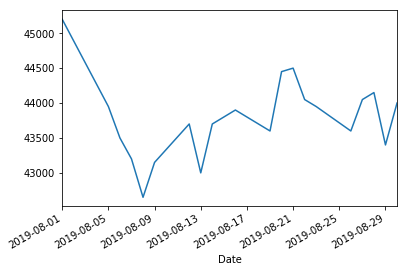

In [0]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2019,8,1)
end = datetime(2019,8,30)
 
df = wb.DataReader('005930.KS', 'yahoo',start,end)
df.head()

%matplotlib inline
df['Close'].plot()